# Problema 1: Determinación de Rango de Estabilidad RK2  

* En el primer problema se pide demostrar, de manera anlítica, que el rango de estabilidad del método Runge Kutta de orden 2 es $-2 \leq h\lambda \leq 0$ al resolver la ecuación siguente:

$$
\frac{d \vec{y}}{dt} = \lambda \vec{y}
$$

* Para esto, recordamos los pasos que constituyen el método RK2 y sobre los se trabajará para mostrar el rango estable. Primero, los pasos $k_1$ y $k_2$ en base a los cuáles se estima el siguiente paso:

$$
\vec{k}_1 = h \vec{f}(\vec{t}_n, \vec{y}_n)
$$
$$
\vec{k}_2 = h \vec{f}(\vec{t}_{n + \frac{1}{2}}, (\vec{y}_n + \vec{k}_2/2)) 
$$

* Evaluando en la ecuación correspondiente:

$$
\vec{k}_1 = h \lambda \vec{y}_n
$$
$$
\vec{k}_2 = h \lambda \vec{y}_n (1 + \frac{h \lambda}{2}) 
$$

* Con esto, el paso $n + 1$ quedaría de la siguiente manera:

$$
\vec{y}_{n + 1} = \vec{y}_n (1 + h \lambda + \frac{(h \lambda)^2}{2})
$$

* Ahora, tomando $\vec{y}  = \bar{\vec{y}} + \vec{\mathcal{E}}$, donde $\bar{\vec{y}}$ satisface la relación de recurrencia, se puede restar esos términos y quedarse con la recurrencia para el error: 

$$
\vec{\mathcal{E}}_{n + 1} = \vec{\mathcal{E}}_n (1 + h \lambda + \frac{(h \lambda)^2}{2})
$$

* Definiendo la expresión entre paréntesis como $\gamma(h\lambda)$ , la condición de estabilidad (es decir, que el error no sea creciente), se expresa como:

$$
| \gamma(h\lambda) | \leq 1 \implies | 1 + h \lambda + \frac{(h \lambda)^2}{2} | \leq 1   
$$

* Notando que, si $\lambda > 0$, la relación de arriba sería siempre falsa, por lo que se toma el caso $\lambda \leq 0$ y considerando $h > 0$, se tiene:

$$
\begin{aligned}
&&-1 \leq 1 + h \lambda + \frac{(h \lambda)^2}{2}  &\leq 1 \\
&\implies &-2 \leq h \lambda + \frac{(h \lambda)^2}{2}  &\leq 0 \\
&\implies &h \lambda + \frac{(h \lambda)^2}{2}  &\leq 0  \\
&&h \lambda + \frac{(h \lambda)^2}{2} &\geq -2
\end{aligned}
$$

* De la primera desigualdad se obtiene factorizando y en la igualdad que $h\lambda = 0$ y que $(1 + h\lambda/2) = 0$, de donde $h\lambda = -2$, límites entre los cuáles se cumplen ambas desigualdades. Por lo tanto, el rango de estabilidad para RK2 en este problema es:

$$
-2 \leq h \lambda \leq 0
$$

# Problema 2 y 3: Osilador Armónico Forzado con RK4 y RK2

* Se implementará Runge Kutta de 4to y 2do orden respectivamente para resolver la ecuación siguiente, con el objetivo de determinar el método más eficiente

$$
\frac{d^2x}{dt^2} + \omega^2x = a_0\sin{(kx - \omega t)}
$$

In [15]:
import numpy as np
from matplotlib import pyplot as plt

# Constantes del problema
a = 1         # a y omega rbitrarios
om = 1
Om = 2* np.pi *om
k = np.pi * 2 / (a / om ** 2)

# Tiempos inicial y final
P = 2 * np.pi / om
t0 = 0
t_max = 5 * P

# Pasos temporales (dos casos)
h1 = 1e-2 / om
h2 = 1e-3 / om

# Condiciones Iniciales de posición y velocidad
x0 = 0
v0 = a / om

# Lista de ctes. y condiciones iniciales
ctes = [a, om, Om, k]
i0 = [t0, x0, v0]

In [2]:
# Definición de la función en particular a utilizar, definiendo la derivada temporal de x como la velocidad

def f(t, y, args):
    a, om, Om, k = args
    x, v = y
    dx = v
    dv = (-(om**2) * x
         + a * np.sin(k * x - Om * t))
    arr = np.array([dx, dv])
    return arr

In [3]:
# Implementación del RK4

def RK(f, tf, i0, h, args, method):
  t, *y = i0
  y = np.array(y)

  a, om, _, _ = args

  # Normalización
  t = om * t
  y[1] = (y[1] * (om**2)) / a

  t_val = [t] # en este punto, t e y son los valores iniciales
  y_val = [y]

  if method == 'RK2':
    h = 5e-1 * h  # Pasos temporales dos veces más cortos

  while t < tf:
    if t + h > tf:
      h = tf - t # Aseguramos un último paso, no igual al resto, que llegue al tiempo final

    # Pasos del método
    k1 = h * f(t, y, args)
    k2 = h * f(t + h/2, y + k1/2, args)
    k3 = h * f(t + h/2, y + k2/2, args)
    k4 = h * f(t + h, y + k3, args)

    # Pasos siguientes dependientes del orden de RK a utilizar
    t += h
    if method == 'RK2':
      y = y + k2 
    if method == 'RK4':
      y = y + (k1 + 2*k2 + 2*k3 + k4)/6

    # Guardado del paso
    t_val.append(t)
    y_val.append(y)
  t_arr = np.array(t_val)
  y_arr = np.array(y_val)

  return t_arr, y_arr



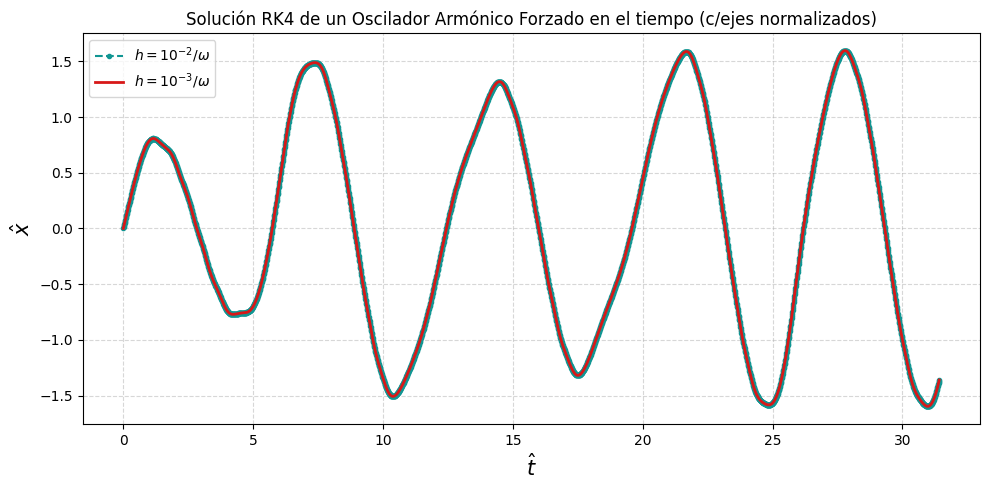

In [16]:
# Implementaciones
t1, y1 = RK(f, t_max, i0, h1, ctes, 'RK4')
t2, y2 = RK(f, t_max, i0, h2, ctes, 'RK4')

# Graficando
x1 = y1[:, 0]
x2 = y2[:, 0]

plt.figure(figsize = (10, 5))
plt.plot(t1, x1, label = '$h = 10^{-2} / \omega$', color = '#119693', ls = '--', marker = 'o', markersize = 3)
plt.plot(t2, x2, label = '$h = 10^{-3} / \omega$', color = '#d71818', ls = '-', linewidth = 2)
plt.xlabel('$\hat{t}$', fontsize = 15)
plt.ylabel('$\hat{x}$', fontsize = 15)
plt.title('Solución RK4 de un Oscilador Armónico Forzado en el tiempo (c/ejes normalizados)')
plt.grid(alpha = 0.5, ls = '--')
plt.legend()
plt.tight_layout()
plt.show()


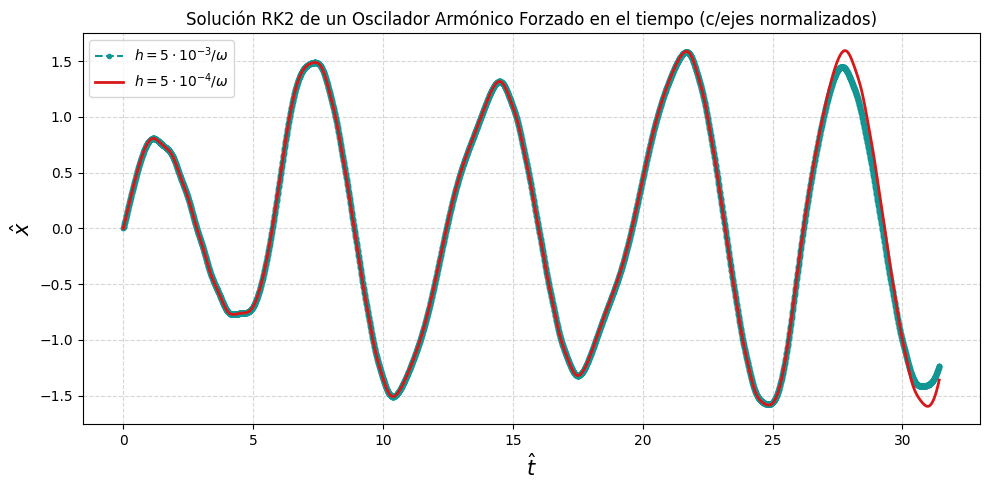

In [17]:
# Implementación Runge Kutta 2
# Cómo se definió en la misma función, simplemente se evalúa en el método RK2

t1_rk2, y1_rk2 = RK(f, t_max, i0, h1, ctes, 'RK2')
t2_rk2, y2_rk2 = RK(f, t_max, i0, h2, ctes, 'RK2')

# Graficando
x1_rk2 = y1_rk2[:, 0]
x2_rk2 = y2_rk2[:, 0]

plt.figure(figsize = (10, 5))
plt.plot(t1_rk2, x1_rk2, label = '$h = 5 \cdot 10^{-3} / \omega$', color = '#119693', ls = '--', marker = 'o', markersize = 3)
plt.plot(t2_rk2, x2_rk2, label = '$h = 5 \cdot 10^{-4} / \omega$', color = '#d71818', ls = '-', linewidth = 2)
plt.xlabel('$\hat{t}$', fontsize = 15)
plt.ylabel('$\hat{x}$', fontsize = 15)
plt.title('Solución RK2 de un Oscilador Armónico Forzado en el tiempo (c/ejes normalizados)')
plt.grid(alpha = 0.5, ls = '--')
plt.legend()
plt.tight_layout()
plt.show()


## Análisis de resultados

* Como se aprecia en los gráficos, el método de RK2 tiene ciertos problemas de estabilidad después de $\hat{t} = 25$, cosa que no se presenta en RK4.  
Además, el tiempo de ejecución de RK4 es menor al de RK2: si bien RK2 realiza menos cálculos por iteración, el hecho de tomar el doble de pasos  
hace que le tome más tiempo completar el ciclo, mientras que RK4, incluso haciendo dos veces los cálculos por paso, aprovecha el poder usar pasos  
más largos de manera estable. Por esto, se concluye que el método de Runge Kutta de orden 4 es el más eficiente para resolver este problema.